<img src="https://raw.githubusercontent.com/ITBA-Python/Certificacion-Profesional-Python/main/assets/clase2/Headers%20c%C3%A1talogo_Mesa%20de%20trabajo%201%20copia%2044.jpg" width="1800">



# Certificación Avanzada en Deep Learning
# Introducción a Python
# TP Integrador

El objetivo del trabajo es integrar los conocimientos vistos en las primeras clases y dejar preparada una base para realizar algunos trabajos durante el curso de Probabilidad, Estadística y Álgebra en Python.  


# Análisis EDA de los dataset provistos
## ------------------------------------
# Integrantes del grupo:
## ------------------------------------
## Griselda Martiarena
## Julieta María Alejandra Salas
## Juan Leiva Polo
## Iván Gawek

<img src="https://raw.githubusercontent.com/ITBA-Python/Certificacion-Profesional-Python/main/assets/clase2/LOGOTIPO_sin_fondo_positivo_sin_bajada.png" width="400">

# EDA Dataset Bloque: PERSONAS

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
df_usuarios = pd.read_csv('usuarios.csv')

## 1. Carga de Datos

In [97]:
df_personas = pd.read_csv('personas.csv')
personas=df_personas.rename(columns = {'Full Name':'nombre', 'year of birth':'fecha_nacimiento', 'Zip Code':'zip_code', 'id':'id_personas', 'Gender':'genero'})
personas.head(2)

,id_personas,nombre,fecha_nacimiento,genero,zip_code
0,1,Robert Stanley,1974,M,85711
1,2,Heather Bossey,1945,F,94043


## 2. Exploración del dataset

In [98]:
print(df_personas.head())
print(df_personas.info())
print(df_personas.describe())

   id          Full Name  year of birth Gender Zip Code
0   1     Robert Stanley           1974      M    85711
1   2     Heather Bossey           1945      F    94043
2   3          Don Davis           1975      M    32067
3   4    Daniel Mccauley           1974      M    43537
4   5  Janice Mccullough           1965      F    15213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             943 non-null    int64 
 1   Full Name      943 non-null    object
 2   year of birth  943 non-null    int64 
 3   Gender         943 non-null    object
 4   Zip Code       943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
               id  year of birth
count  943.000000     943.000000
mean   472.000000    1963.948038
std    272.364951      12.192740
min      1.000000    1925.000000
25%    236.500000    1955.000000
50%  

## 3. Verificar y Limpiar Datos Nulos

### a. Notas: Sin nulos y duplicados.

In [99]:
print(personas.isnull().sum())

print(personas.duplicated().sum())

personas = personas.drop_duplicates()

id_personas         0
nombre              0
fecha_nacimiento    0
genero              0
zip_code            0
dtype: int64
0


## 4. Análisis la Distribución de Géneros

### a. Notas: El porcentaje es mayor entre personas del género masculino

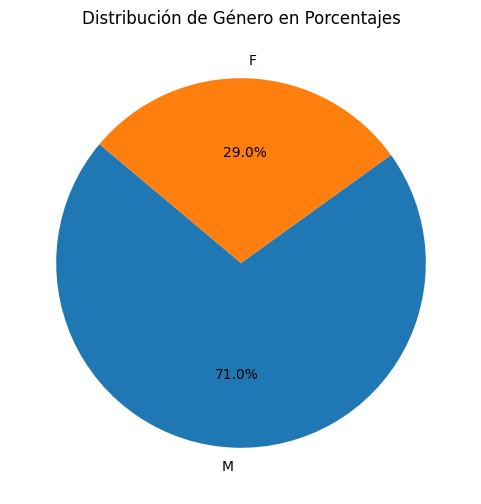

In [121]:
gender_counts = personas['genero'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Género en Porcentajes')
plt.show()

## 5. Análisis la Distribución de Edades y Género

### a. Notas: Entre 43 y 77 años, se encuentra concentrada la mayor cantidad de usuarios con representación del género MASCULINO entre los 43 y 56 años, meintras la distribución mayoritaria de FEMENINOS es entre los 43 y 55 años. La distribución general por edades es homogénea de acuerdo a las proporciones de géneros.

genero  F  M
edad        
33      0  1
36      0  1
37      0  1
39      2  3
40      3  0
...    .. ..
92      0  1
94      0  2
95      0  2
96      1  2
99      0  1

[61 rows x 2 columns]


<Figure size 1000x3000 with 0 Axes>

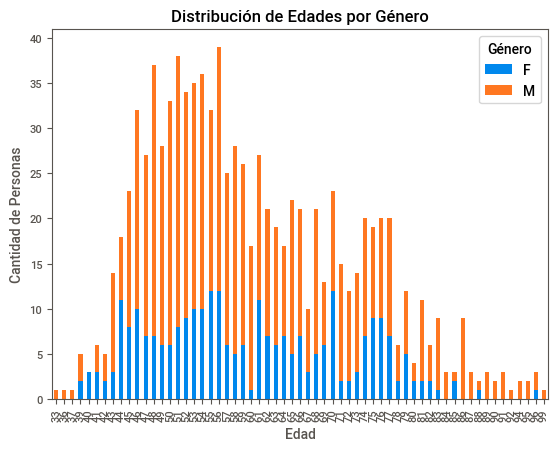

In [127]:
personas['today']=2024
personas['today'].dtypes
personas['edad']=personas['today']-personas['fecha_nacimiento']

pivot_table = personas.pivot_table(index='edad', columns='genero', aggfunc='size', fill_value=0)

print(pivot_table)

plt.figure(figsize=(10,30))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribución de Edades por Género')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Género')
plt.show()

In [128]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\ivano\appdata\local\programs\python\python311\lib\site-packages\pdlist-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
import sweetviz as sv
reporte_personas = sv.analyze(personas)
reporte_personas.show_html('sweetviz_report_personas.html')

                                             |                                                                …

Report sweetviz_report_personas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


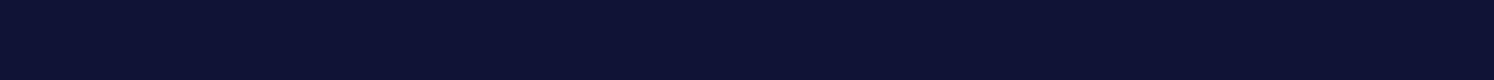

# EDA Dataset Bloque: USUARIOS

## 1. Carga de Datos

In [130]:
df_usuarios = pd.read_csv('usuarios.csv')
usuarios=df_usuarios.rename(columns = {'Active Since':'fecha_alta', 'Occupation': 'ocupacion', 'id': 'id_usuario'})
usuarios['fecha_alta'] = pd.to_datetime(usuarios['fecha_alta'])
usuarios['fecha_alta'] = usuarios['fecha_alta'].dt.strftime('%d-%m-%Y')

## 2. Exploración del dataset

In [131]:
print(usuarios.head())
print(usuarios.info())
print(usuarios.describe())

   id_usuario   ocupacion  fecha_alta
0           1  technician  22-09-1997
1           2       other  27-02-1998
2           3      writer  07-03-1998
3           4  technician  08-04-1998
4           5       other  30-09-1997
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_usuario  943 non-null    int64 
 1   ocupacion   943 non-null    object
 2   fecha_alta  943 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.2+ KB
None
       id_usuario
count  943.000000
mean   472.000000
std    272.364951
min      1.000000
25%    236.500000
50%    472.000000
75%    707.500000
max    943.000000


## 3. Verificar y Limpiar Datos Nulos

### a. Notas: Sin nulos ni duplicados.

In [132]:
print(usuarios.isnull().sum())

id_usuario    0
ocupacion     0
fecha_alta    0
dtype: int64


## 4. Distribución de ocupacion

### a. Notas: Los estudiantes 20.5% son los de mayor presencia, segudiso por otros y educadores, con aproximadamente el 10.8 y 10% respectivamente. Administradores, programadores e ingenieros, se distribuyen entre el 8.2 y el 7%

ocupacion
student          193
other            102
educator          94
administrator     77
engineer          67
programmer        65
librarian         51
writer            45
executive         31
scientist         30
artist            27
technician        27
marketing         25
entertainment     17
healthcare        16
ITBA              15
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64


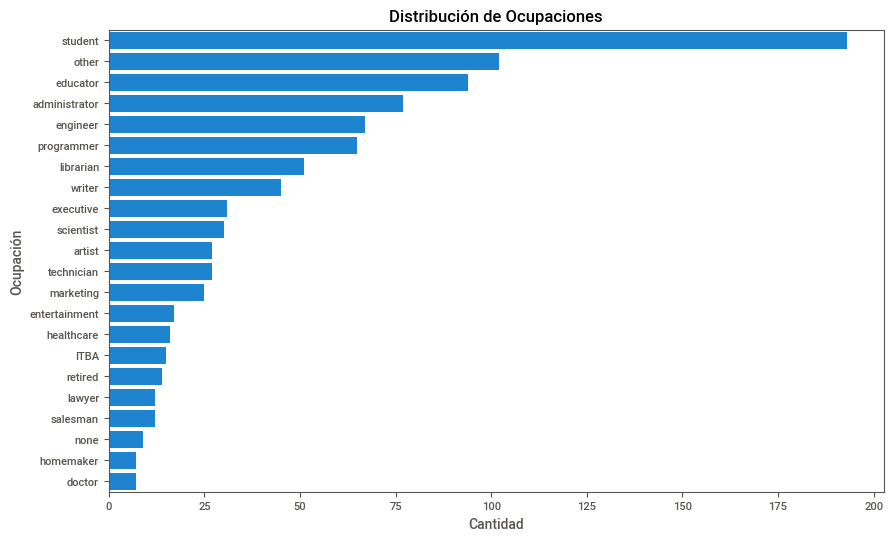

In [135]:
ocupacion_counts = usuarios['ocupacion'].value_counts()
print(ocupacion_counts)
plt.figure(figsize=(10,6))
sns.countplot(y='ocupacion', data=usuarios, order=ocupacion_counts.index)
plt.title('Distribución de Ocupaciones')
plt.xlabel('Cantidad')
plt.ylabel('Ocupación')
plt.show()

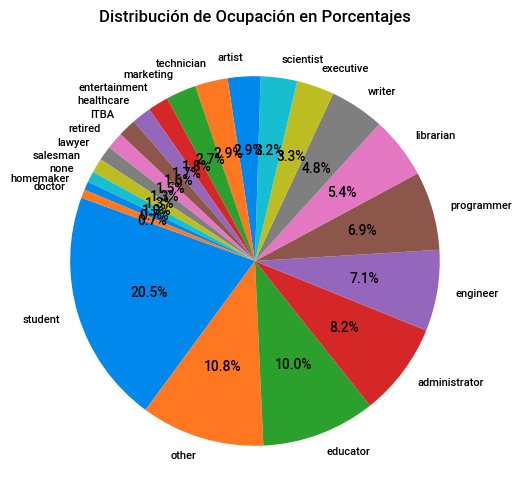

In [136]:
ocupacion_counts = usuarios['ocupacion'].value_counts()

ocupacion_percentages = (ocupacion_counts / ocupacion_counts.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(ocupacion_percentages, labels=ocupacion_percentages.index, autopct='%1.1f%%', startangle=160)
plt.title('Distribución de Ocupación en Porcentajes')
plt.show()

## 5. Análisis de fecha de alta

### a. Notas: Las altas han sucedido mayoritariamente en 1997, y en ambos años el mes con mayor volumen de altas ha sido Noviembre

C:\Users\ivano\AppData\Local\Temp\ipykernel_2840\4226336573.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  usuarios['fecha_alta'] = pd.to_datetime(usuarios['fecha_alta'])


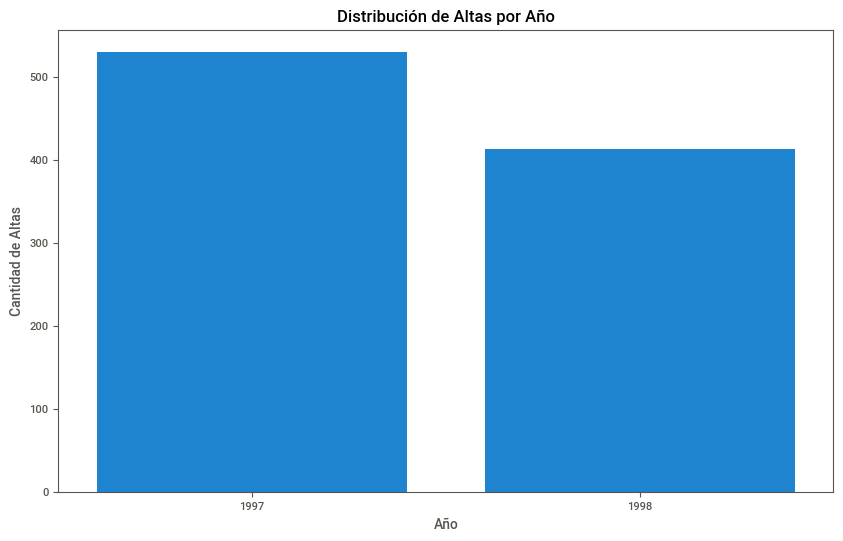

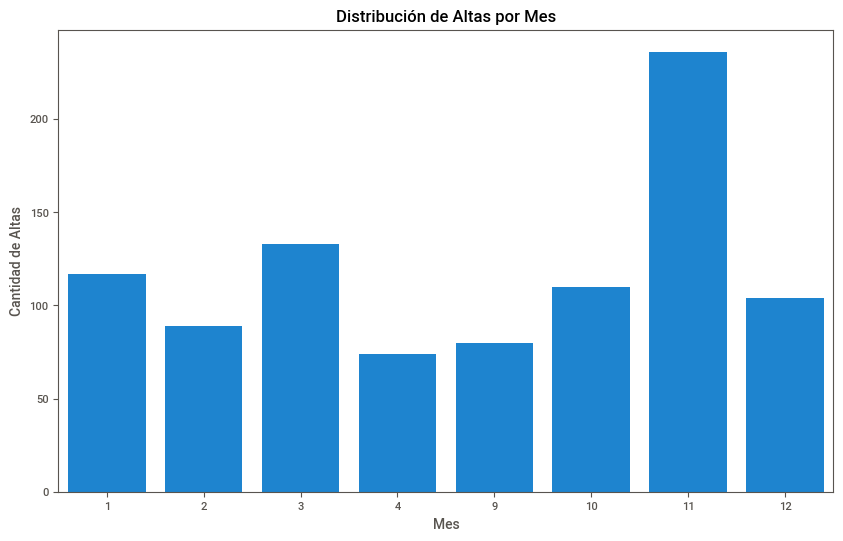

In [141]:
usuarios['fecha_alta'] = pd.to_datetime(usuarios['fecha_alta'])
usuarios['año_alta'] = usuarios['fecha_alta'].dt.year
usuarios['mes_alta'] = usuarios['fecha_alta'].dt.month

# Distribución de altas por año
plt.figure(figsize=(10,6))
sns.countplot(x='año_alta', data=usuarios)
plt.title('Distribución de Altas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Altas')
plt.show()

# Distribución de altas por mes
plt.figure(figsize=(10,6))
sns.countplot(x='mes_alta', data=usuarios)
plt.title('Distribución de Altas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Altas')
plt.show()


## 6. Relación entre ocupacion y fecha_alta:

### a. Notas: Sin datos que destacar con excepción del incremento de altas de libreros, técniccos, personal de la saludos y abogados en 1998.

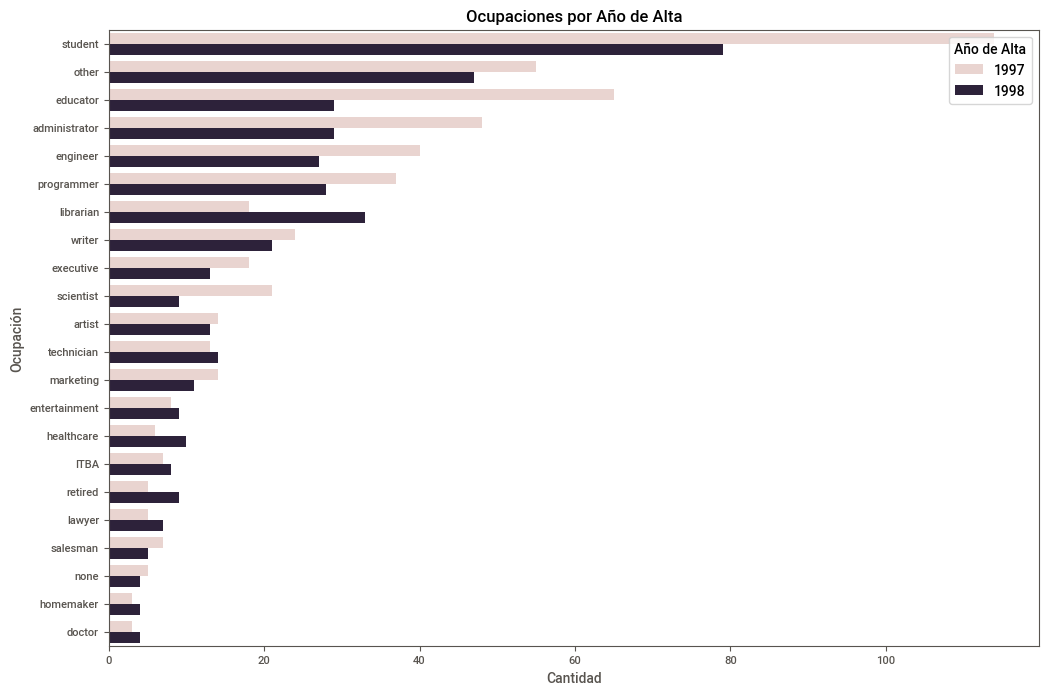

In [142]:
plt.figure(figsize=(12,8))
sns.countplot(y='ocupacion', hue='año_alta', data=usuarios, order=ocupacion_counts.index)
plt.title('Ocupaciones por Año de Alta')
plt.xlabel('Cantidad')
plt.ylabel('Ocupación')
plt.legend(title='Año de Alta', loc='upper right')
plt.show()

## 7. Reporte visual del bloque USUARIOS

In [143]:
reporte_usuarios = sv.analyze(usuarios)
reporte_usuarios.show_html('sweetviz_report_usuarios.html')

                                             |                                                                …

Report sweetviz_report_usuarios.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


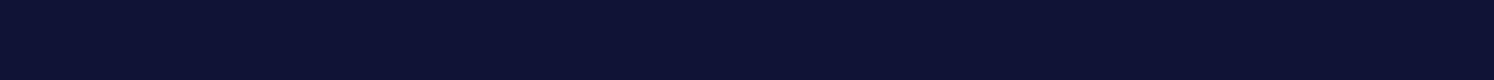

# EDA Dataset Bloque: SCORES

## 1. Carga de Datos

In [144]:
df_scores = pd.read_csv('scores.csv')
df_scores = df_scores.drop(columns=['Unnamed: 0'])
scores=df_scores.rename(columns = {'Date':'timestamp', 'user_id': 'id_usuario'})
scores['timestamp'] = pd.to_datetime(scores['timestamp'])
scores['timestamp'] = scores['timestamp'].dt.strftime('%d-%m-%Y')
scores.sort_values(by='movie_id')

,id_usuario,movie_id,rating,timestamp
25741,84,1,2,30-12-1997
93639,806,1,4,17-12-1997
55726,768,1,5,03-01-1998
49529,92,1,4,02-10-1997
89079,419,1,4,13-11-1997
...,...,...,...,...
75323,863,1678,1,07-03-1998
67302,863,1679,3,07-03-1998
80394,863,1680,2,07-03-1998
92329,896,1681,3,11-02-1998


## 2. Exploración del dataset

In [145]:
print(scores.head())  
print(scores.info())  
print(scores.describe())

   id_usuario  movie_id  rating   timestamp
0         196       242       3  04-12-1997
1         186       302       3  04-04-1998
2          22       377       1  07-11-1997
3         244        51       2  27-11-1997
4         166       346       1  02-02-1998
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_usuario  100000 non-null  int64 
 1   movie_id    100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamp   100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB
None
         id_usuario       movie_id         rating
count  100000.00000  100000.000000  100000.000000
mean      462.48475     425.530130       3.529860
std       266.61442     330.798356       1.125674
min         1.00000       1.000000       1.000000
25%       254.00000     175.000000       3.000000
50%       447.00000     32

## 3. Verificar y Limpiar Datos Nulos

### a. Notas: Sin duplicaods ni datos nulos.

In [146]:
print(scores.isnull().sum())

id_usuario    0
movie_id      0
rating        0
timestamp     0
dtype: int64


## 4. Distribución de rating

In [239]:
merged_df_user= pd.merge(scores, usuarios, on='id_usuario', how='inner')
rating_counts_job = merged_df_user.groupby(['id_usuario', 'ocupacion']).size()
rating_counts_job.sort_values(ascending=False).head(20)

id_usuario  ocupacion    
405         healthcare       737
655         healthcare       685
13          educator         636
450         educator         540
276         student          518
416         student          493
537         engineer         490
303         student          484
234         retired          480
393         student          448
181         executive        435
279         programmer       434
429         student          414
846         lawyer           405
7           administrator    403
94          student          400
682         programmer       399
308         retired          397
92          entertainment    388
293         writer           388
dtype: int64

In [240]:
merged_df_user

,id_usuario,movie_id,rating,timestamp,ocupacion,fecha_alta,año_alta,mes_alta
0,196,242,3,04-12-1997,writer,1997-12-04,1997,12
1,196,393,4,04-12-1997,writer,1997-12-04,1997,12
2,196,381,4,04-12-1997,writer,1997-12-04,1997,12
3,196,251,3,04-12-1997,writer,1997-12-04,1997,12
4,196,655,5,04-12-1997,writer,1997-12-04,1997,12
...,...,...,...,...,...,...,...,...
99995,941,919,5,23-09-1997,student,1997-09-23,1997,9
99996,941,273,3,23-09-1997,student,1997-09-23,1997,9
99997,941,1,5,23-09-1997,student,1997-09-23,1997,9
99998,941,294,4,23-09-1997,student,1997-09-23,1997,9


In [243]:
merged_df_user['timestamp'] = pd.to_datetime(merged_df_user['timestamp'], format='%d-%m-%Y')
today = pd.to_datetime('today')  # Obtener la fecha de hoy
merged_df_user['recency'] = today - merged_df_user['timestamp']
print(merged_df_user[['timestamp', 'recency']].head())

   timestamp                   recency
0 1997-12-04 9670 days 10:24:24.174317
1 1997-12-04 9670 days 10:24:24.174317
2 1997-12-04 9670 days 10:24:24.174317
3 1997-12-04 9670 days 10:24:24.174317
4 1997-12-04 9670 days 10:24:24.174317


## 5. Análisis de timestamp

2024-05-23 19:40:30,770 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-23 19:40:30,853 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


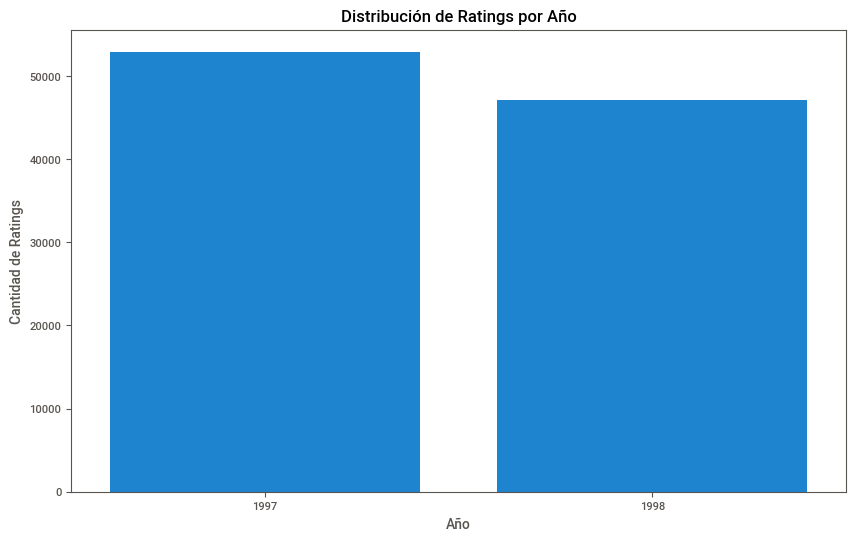

2024-05-23 19:40:31,283 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-23 19:40:31,376 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


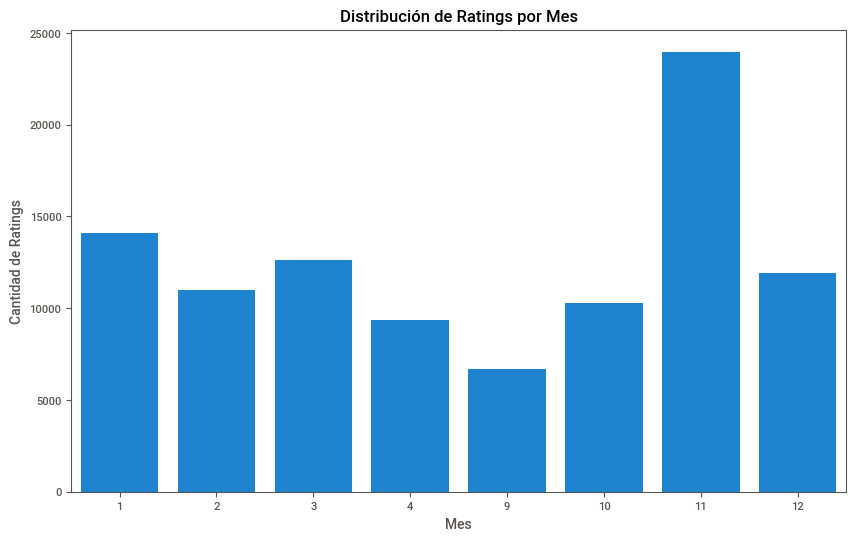

In [56]:
scores['timestamp'] = pd.to_datetime(scores['timestamp'], format='%d-%m-%Y')
scores['año'] = scores['timestamp'].dt.year
scores['mes'] = scores['timestamp'].dt.month
plt.figure(figsize=(10,6))
sns.countplot(x='año', data=scores)
plt.title('Distribución de Ratings por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='mes', data=scores)
plt.title('Distribución de Ratings por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ratings')
plt.show()


## 6. Relación entre rating y año


2024-05-23 19:40:36,900 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-23 19:40:36,988 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


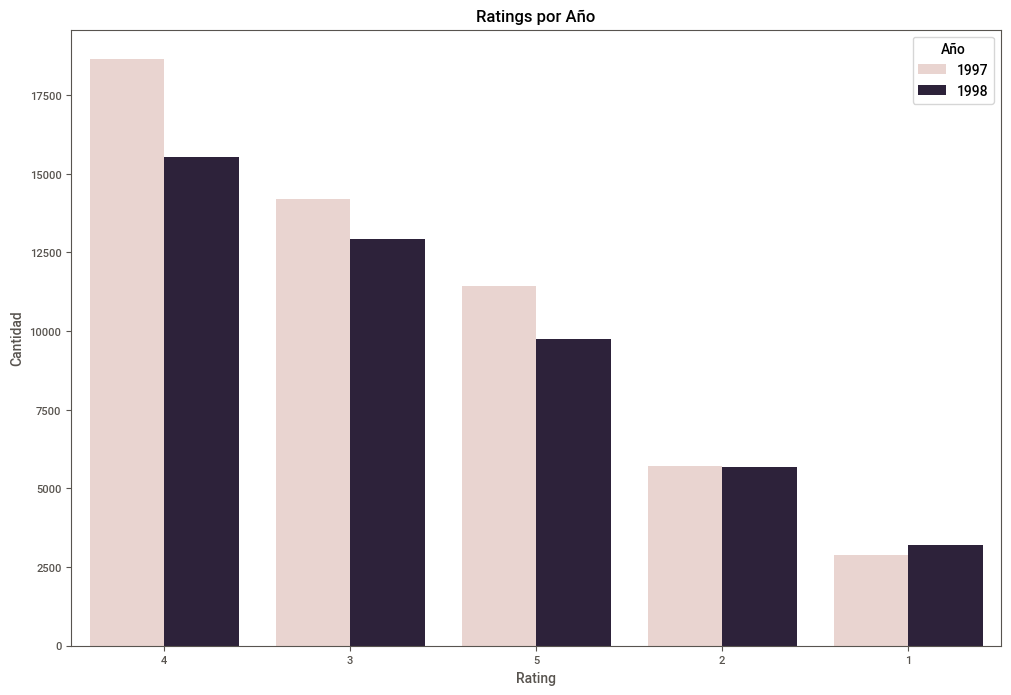

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', hue='año', data=scores, order=rating_counts.index)
plt.title('Ratings por Año')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.legend(title='Año', loc='upper right')
plt.show()

## 7. Relación entre rating y movie_id


In [261]:
merged_df_movie= pd.merge(merged_df_user, peliculas, on='movie_id', how='inner')
merged_df_movie.head(5)

,id_usuario,movie_id,rating,timestamp,ocupacion,fecha_alta,año_alta,mes_alta,recency,Name,genre,Year
0,196,242,3,1997-12-04,writer,1997-12-04,1997,12,9670 days 10:24:24.174317,Kolya (1996),Comedy,1997
1,305,242,5,1998-02-01,programmer,1998-02-01,1998,2,9611 days 10:24:24.174317,Kolya (1996),Comedy,1997
2,6,242,4,1997-12-28,executive,1997-12-28,1997,12,9646 days 10:24:24.174317,Kolya (1996),Comedy,1997
3,234,242,4,1998-03-27,retired,1998-03-27,1998,3,9557 days 10:24:24.174317,Kolya (1996),Comedy,1997
4,63,242,3,1997-10-01,marketing,1997-10-01,1997,10,9734 days 10:24:24.174317,Kolya (1996),Comedy,1997


movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: rating, dtype: int64


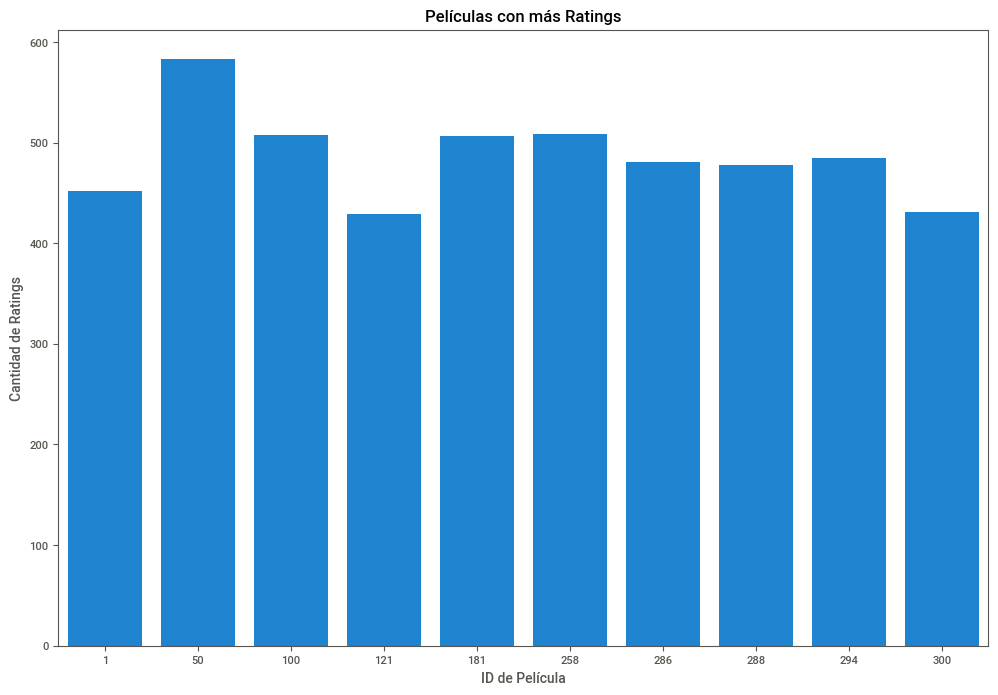

In [248]:
movie_rating_counts = merged_df_movie.groupby('movie_id')['rating'].count().sort_values(ascending=False)

top_movies = movie_rating_counts.head(10)
print(top_movies)

plt.figure(figsize=(12,8))
sns.barplot(x=top_movies.index, y=top_movies.values)
plt.title('Películas con más Ratings')
plt.xlabel('ID de Película')
plt.ylabel('Cantidad de Ratings')
plt.show()

In [260]:
named_top_movies = merged_df_movie[['Name', 'movie_id']]
movie_name_counts_sorted = named_top_movies.groupby(['Name', 'movie_id']).size().sort_values(ascending=False)
print(movie_name_counts_sorted)

Name                                movie_id
Star Wars (1977)                    50          583
Contact (1997)                      258         509
Fargo (1996)                        100         508
Return of the Jedi (1983)           181         507
Liar Liar (1997)                    294         485
                                               ... 
Fire on the Mountain (1996)         677           1
Fear, The (1995)                    1520          1
Symphonie pastorale, La (1946)      1584          1
T-Men (1947)                        1582          1
Á köldum klaka (Cold Fever) (1994)  1633          1
Length: 1681, dtype: int64


In [265]:
movie_ratings = merged_df_movie.groupby('Name')['rating'].mean().reset_index()
top_movies_by_name = movie_ratings.sort_values(by='rating', ascending=False)
top_20_movies_by_name = top_movies_by_name.head(20)
print(top_20_movies_by_name)

                                                   Name    rating
944          Marlene Dietrich: Shadow and Light (1996)   5.000000
1387                                    Star Kid (1997)  5.000000
1172                                 Prefontaine (1997)  5.000000
30                                 Aiqing wansui (1994)  5.000000
1277                          Santa with Muscles (1996)  5.000000
1273               Saint of Fort Washington, The (1993)  5.000000
1359                      Someone Else's America (1995)  5.000000
633                       Great Day in Harlem, A (1994)  5.000000
1472                     They Made Me a Criminal (1939)  5.000000
462   Entertaining Angels: The Dorothy Day Story (1996)  5.000000
1130                             Pather Panchali (1955)  4.625000
79                                          Anna (1996)  4.500000
1357                           Some Mother's Son (1996)  4.500000
956              Maya Lin: A Strong Clear Vision (1994)  4.500000
472       

## 8. Reporte visual del bloque SCORES

In [211]:
reporte_scores = sv.analyze(scores)
reporte_scores.show_html('sweetviz_report_scores.html')

                                             |                                                                …

Report sweetviz_report_scores.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


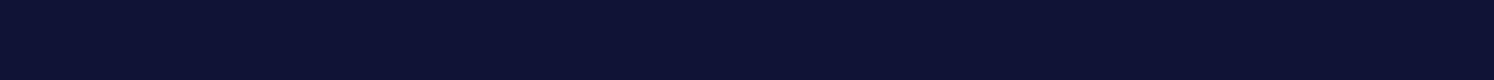

# EDA Dataset Bloque: TRABAJADORES

## 1. Carga de datos

In [212]:
df_trabajadores = pd.read_csv('trabajadores.csv') 
trabajadores=df_trabajadores.rename(columns = {'Working Hours':'time', 'Start Date':'date_join', 'id': 'id_trab'})
trabajadores['date_join'] = pd.to_datetime(trabajadores['date_join'])
trabajadores['date_join'] = trabajadores['date_join'].dt.strftime('%d-%m-%Y')

## 2. Exploración del dataset

In [213]:
print(trabajadores.head())
print(trabajadores.info())
print(trabajadores.describe())

   id_trab Position Category     time   date_join
0       16  Analyst        B   9 - 18  30-03-1998
1       31  Analyst        A   9 - 18  25-09-1997
2      167  Analyst        B   7 - 16  24-10-1997
3      183  Analyst        C  20 - 04  26-01-1998
4      298  Analyst        C   9 - 18  18-10-1997
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_trab    15 non-null     int64 
 1   Position   15 non-null     object
 2   Category   15 non-null     object
 3   time       15 non-null     object
 4   date_join  15 non-null     object
dtypes: int64(1), object(4)
memory usage: 732.0+ bytes
None
          id_trab
count   15.000000
mean   449.266667
std    273.355986
min     16.000000
25%    240.500000
50%    470.000000
75%    647.000000
max    872.000000


## 3. Verificar y Limpiar Datos Nulos

In [214]:
print(trabajadores.isnull().sum())

id_trab      0
Position     0
Category     0
time         0
date_join    0
dtype: int64


## 4. Distribución de Position

Position
Analyst                       7
IT                            2
CTO                           1
CFO                           1
CEO                           1
Sales Regional Manager        1
Marketing Regional Manager    1
IT Manager                    1
Name: count, dtype: int64


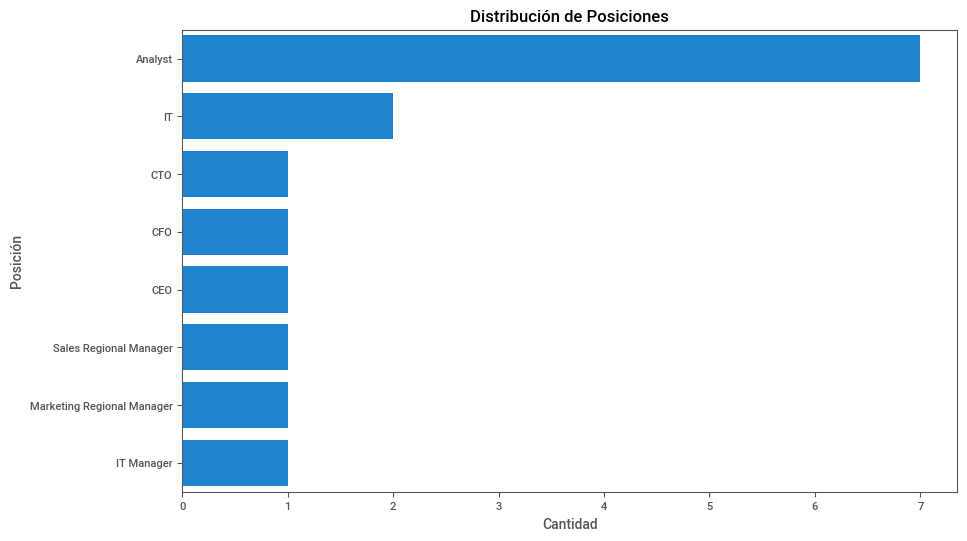

In [215]:
position_counts = trabajadores['Position'].value_counts()
print(position_counts)
plt.figure(figsize=(10,6))
sns.countplot(y='Position', data=trabajadores, order=position_counts.index)
plt.title('Distribución de Posiciones')
plt.xlabel('Cantidad')
plt.ylabel('Posición')
plt.show()

## 5. Distribución de Category

Category
C    6
A    5
B    4
Name: count, dtype: int64


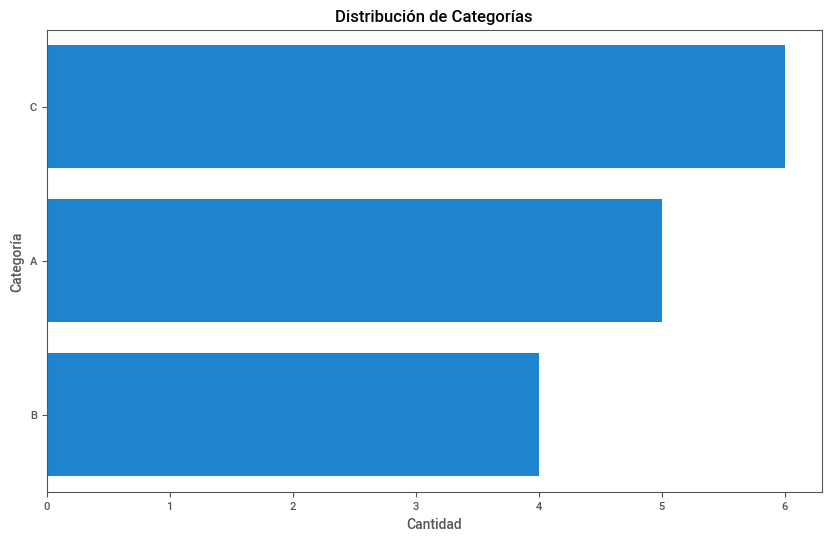

In [216]:
category_counts = trabajadores['Category'].value_counts()
print(category_counts)
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=trabajadores, order=category_counts.index)
plt.title('Distribución de Categorías')
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.show()

## 6. Análisis de Date of Join

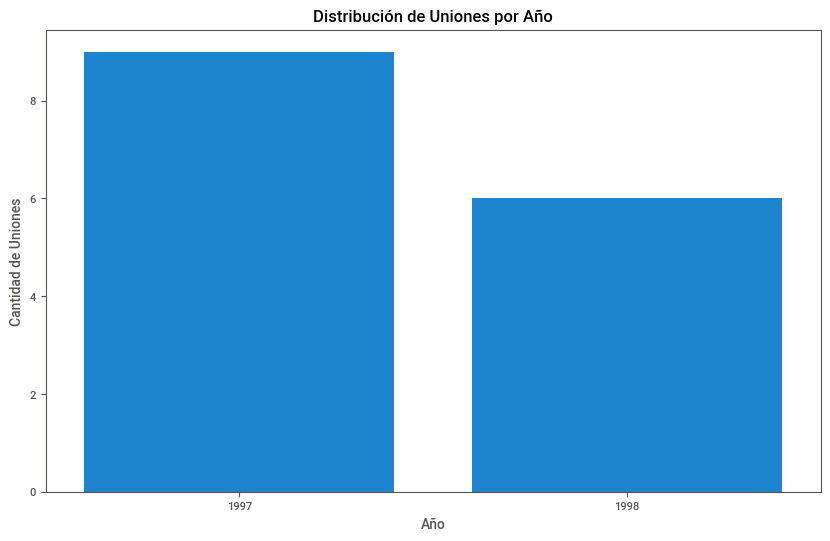

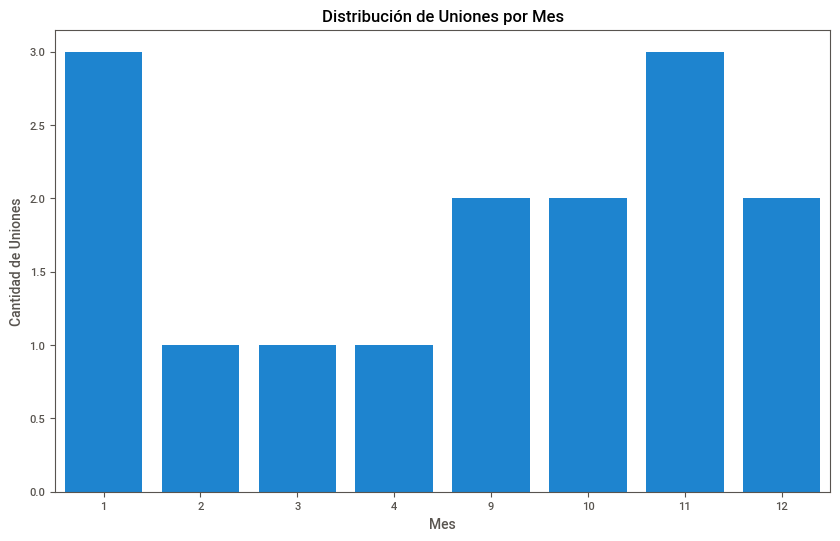

In [217]:
trabajadores['date_join'] = pd.to_datetime(trabajadores['date_join'], format='%d-%m-%Y')
trabajadores['año'] = trabajadores['date_join'].dt.year
trabajadores['mes'] = trabajadores['date_join'].dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='año', data=trabajadores)
plt.title('Distribución de Uniones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Uniones')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='mes', data=trabajadores)
plt.title('Distribución de Uniones por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Uniones')
plt.show()

## 7. Análisis de Time

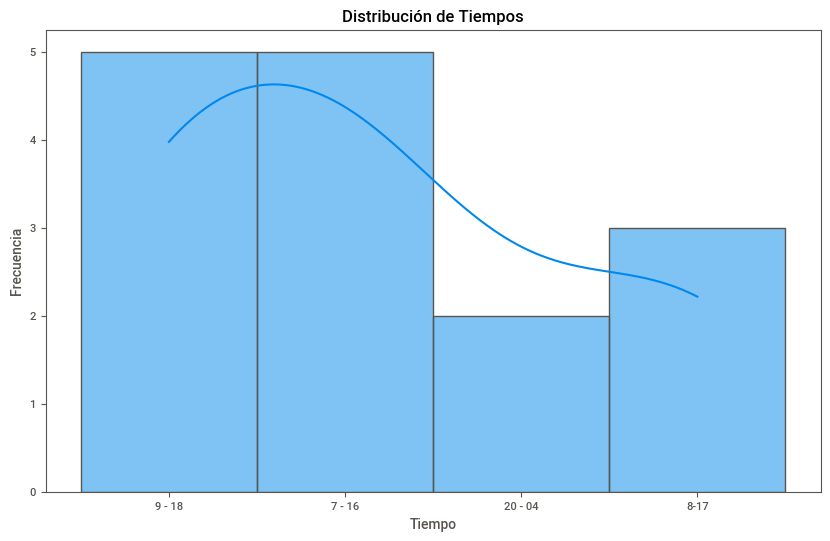

In [225]:
workers=trabajadores['time']
plt.figure(figsize=(10,6))
sns.histplot(workers, bins=30, kde=True)
plt.title('Distribución de Tiempos')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

## 8. Análisis de Position vs Category

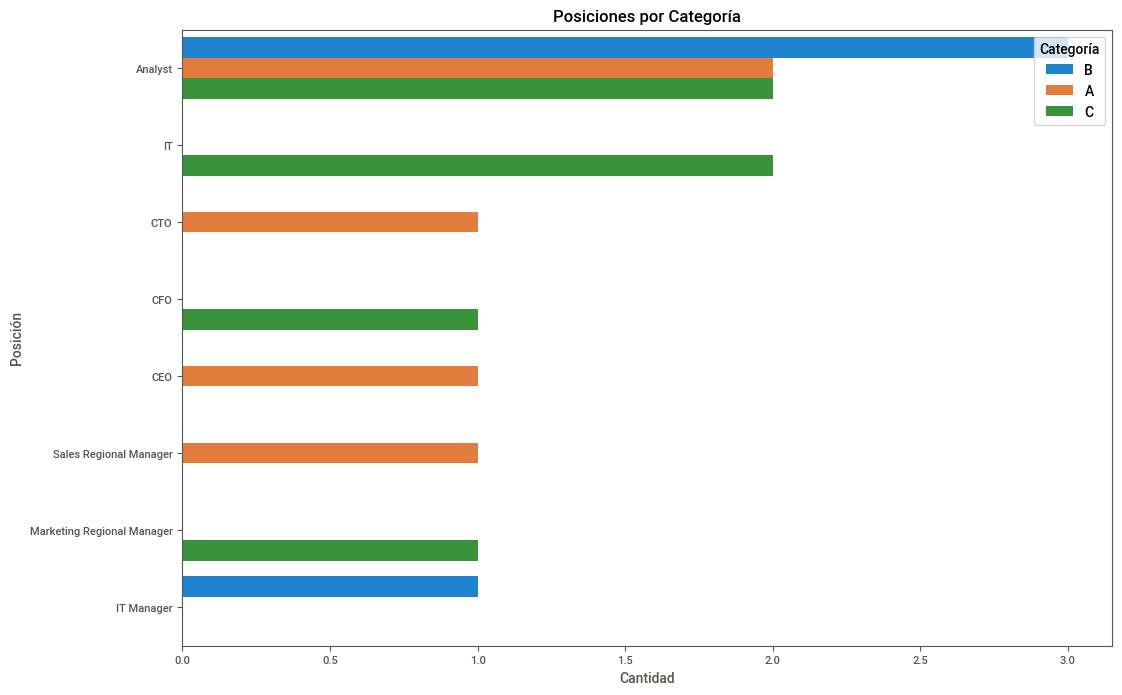

In [226]:
plt.figure(figsize=(12,8))
sns.countplot(y='Position', hue='Category', data=trabajadores, order=position_counts.index)
plt.title('Posiciones por Categoría')
plt.xlabel('Cantidad')
plt.ylabel('Posición')
plt.legend(title='Categoría', loc='upper right')
plt.show()

## 9. Reporte visual del bloque TRABAJADORES

In [227]:
reporte_trabajadores = sv.analyze(trabajadores)
reporte_trabajadores.show_html('sweetviz_report_trabajadores.html')

                                             |                                                                …

Report sweetviz_report_trabajadores.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


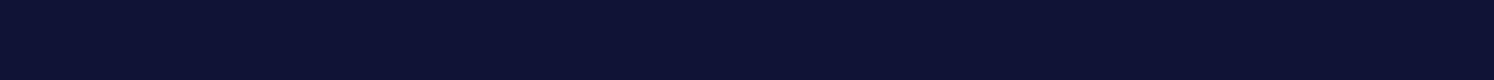

# EDA Dataset Bloque: PELICULAS

## 1. Carga de datos

In [228]:
df_peliculas = pd.read_csv('peliculas.csv')
df_peliculas['genre'] = df_peliculas.apply(lambda x: ', '.join([col for col, val in x.items() if val == 1]), axis=1)
peliculas=df_peliculas.rename(columns = {'Nombre':'Name', 'Release Date':'Year', 'id':'movie_id'})
peliculas['Year'] = pd.to_datetime(peliculas['Year'])
peliculas['Year'] = peliculas['Year'].dt.strftime('%Y')
peliculas=peliculas[['movie_id', 'Name', 'genre', 'Year']]
peliculas

,movie_id,Name,genre,Year
0,1,Toy Story (1995),"id, Animation, Children's, Comedy",1995
1,2,GoldenEye (1995),"Action, Adventure, Thriller",1995
2,3,Four Rooms (1995),Thriller,1995
3,4,Get Shorty (1995),"Action, Comedy, Drama",1995
4,5,Copycat (1995),"Crime, Drama, Thriller",1995
...,...,...,...,...
1677,1678,Mat' i syn (1997),Drama,1998
1678,1679,B. Monkey (1998),"Romance, Thriller",1998
1679,1680,Sliding Doors (1998),"Drama, Romance",1998
1680,1681,You So Crazy (1994),Comedy,1994


## 2. Exploración del dataset

In [229]:
print(peliculas.head())
print(peliculas.info())
print(peliculas.describe())

   movie_id               Name                              genre  Year
0         1   Toy Story (1995)  id, Animation, Children's, Comedy  1995
1         2   GoldenEye (1995)        Action, Adventure, Thriller  1995
2         3  Four Rooms (1995)                           Thriller  1995
3         4  Get Shorty (1995)              Action, Comedy, Drama  1995
4         5     Copycat (1995)             Crime, Drama, Thriller  1995
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  1682 non-null   int64 
 1   Name      1682 non-null   object
 2   genre     1682 non-null   object
 3   Year      1681 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.7+ KB
None
          movie_id
count  1682.000000
mean    841.500000
std     485.695893
min       1.000000
25%     421.250000
50%     841.500000
75%    1261.750000
max    1682.000000


## 3. Verificar y Limpir Datos Nulos

In [230]:
print(peliculas.isnull().sum())
peliculas = peliculas.dropna()

movie_id    0
Name        0
genre       0
Year        1
dtype: int64


## 4. Análisis de la Distribución del Año de las Películas

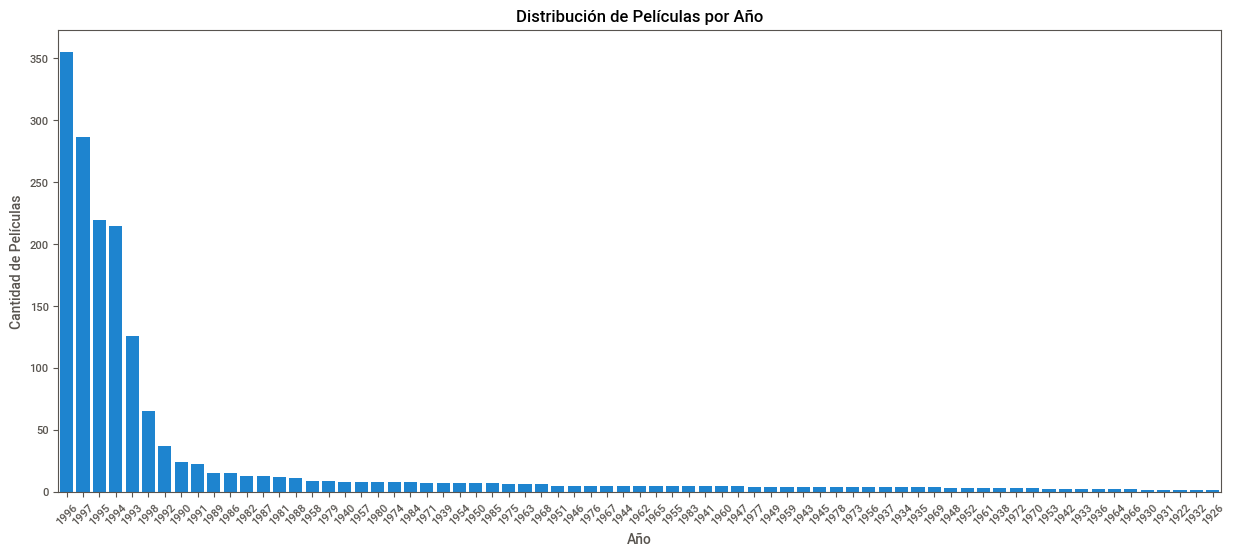

In [231]:
year_counts = peliculas['Year'].value_counts()
plt.figure(figsize=(15,6))
sns.countplot(x='Year', data=peliculas, order=year_counts.index)
plt.title('Distribución de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

## 5. Análisis de la Distribución de Géneros:

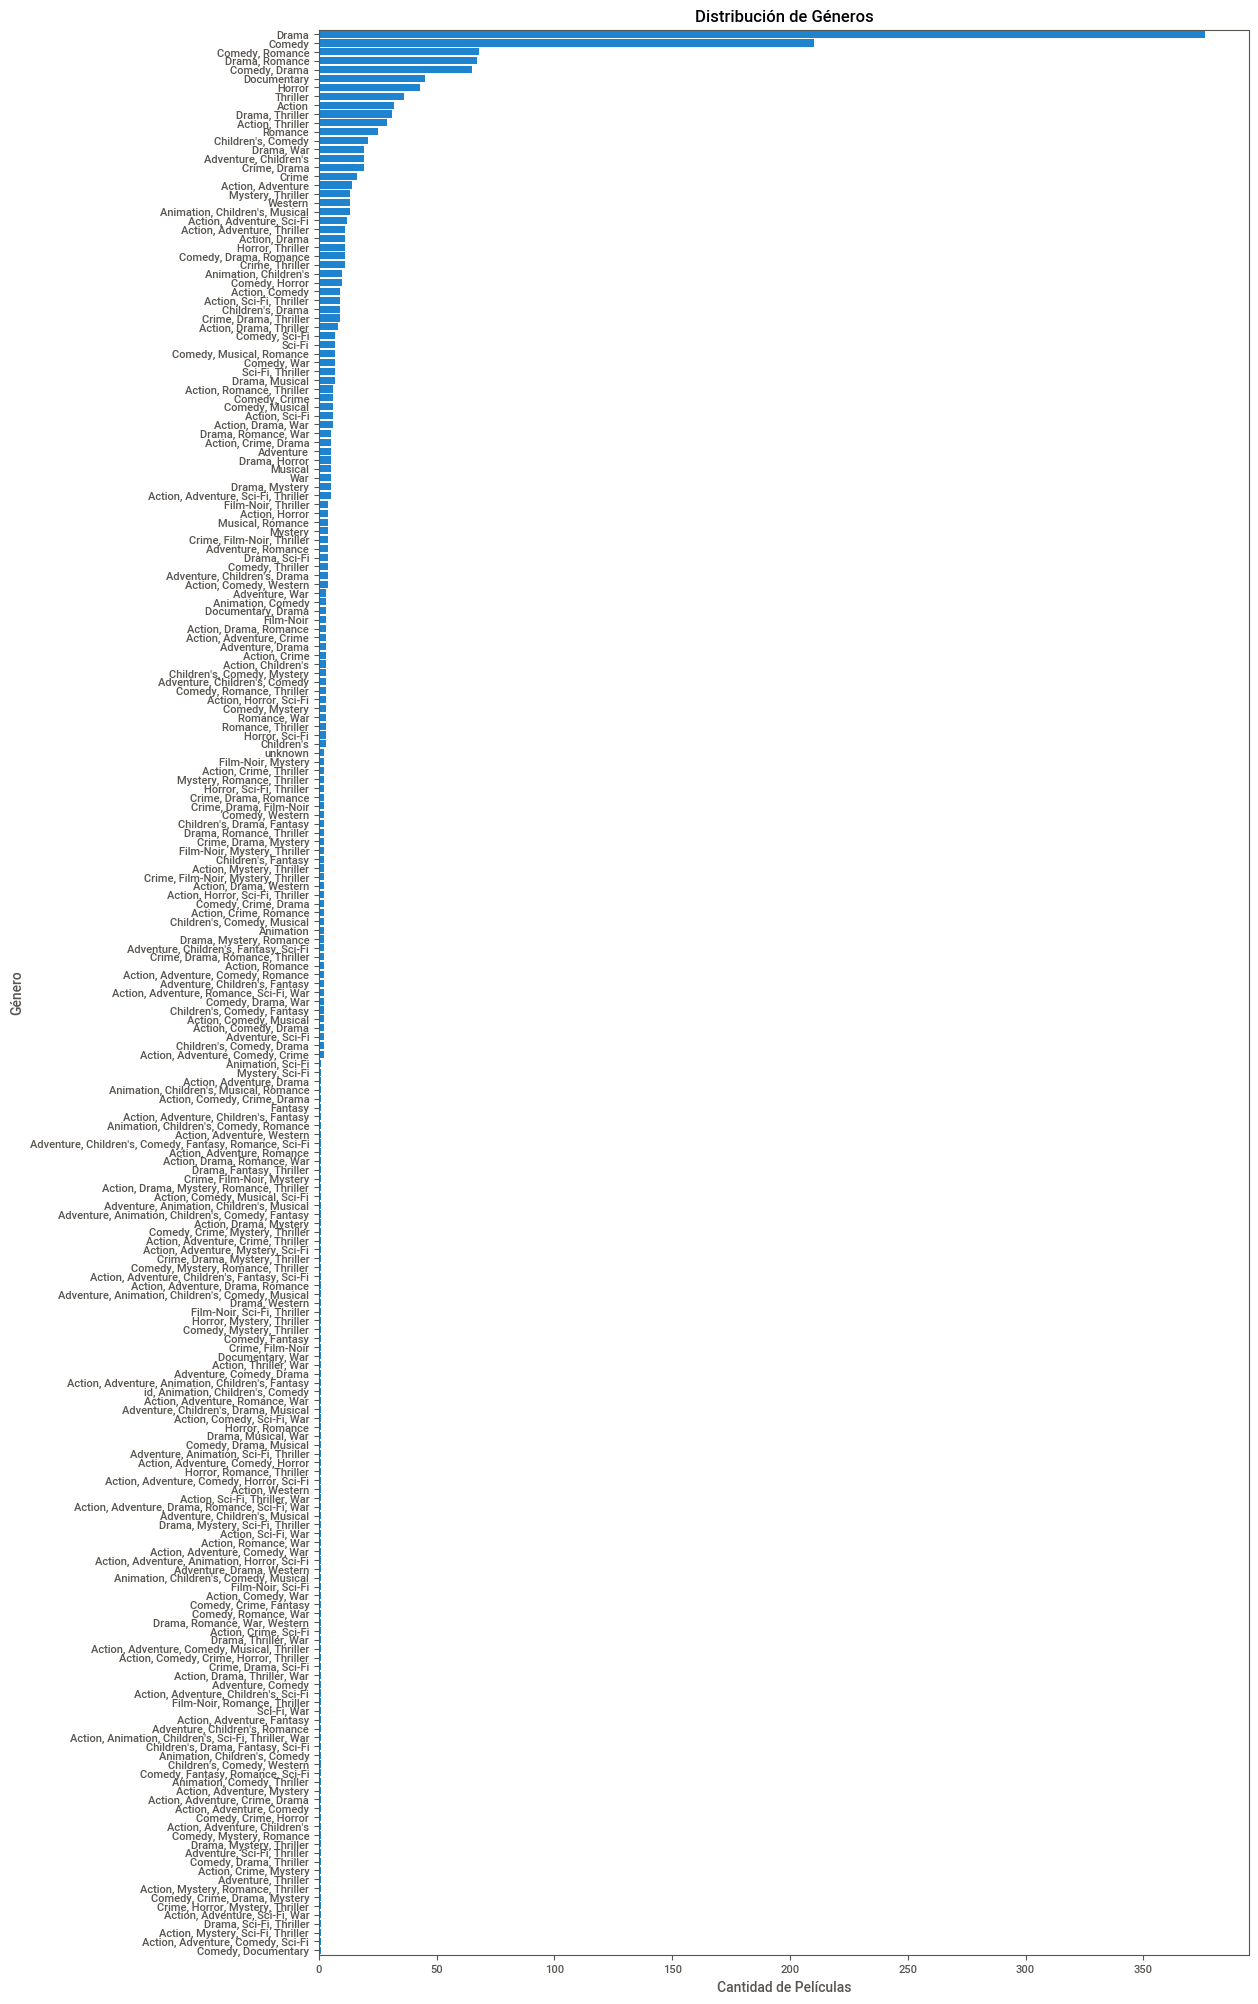

In [86]:
genre_counts = peliculas['genre'].value_counts()
plt.figure(figsize=(12,25))
sns.countplot(y='genre', data=peliculas, order=genre_counts.index)
plt.title('Distribución de Géneros')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.show()

## 6. Reporte visual del bloque PELÍCULAS

In [87]:
reporte_peliculas = sv.analyze(peliculas)
reporte_peliculas.show_html('sweetviz_report_peliculass.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report_peliculass.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
